In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import tensorflow.keras.backend as K

In [2]:
train_path = "veggie_heap_training"
test_path = "veggie_heap_testing"
Img_Size = (224,224)
batch_size = 32
class_names = sorted(os.listdir(train_path))
class_names

["Apatosaur Aphie's Apples",
 "Bluplocephalus Bob's Blueberries",
 "Cherizinoasaur Cher's Cherries",
 "Corythosaurus Cory's Corn",
 "Grapthorina Greta's Grapes",
 "Pachycephalosaurus Perry's Peaches",
 "Pepteranodon Pep's Peppers",
 "Potoceratops Pott's Potatoes",
 "Rhaspdodon Ribery's Raspberries",
 "Stribecosaurus Stan's Strawberries",
 "Thyreosaur Tim's Thyme",
 'vacation_photos']

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

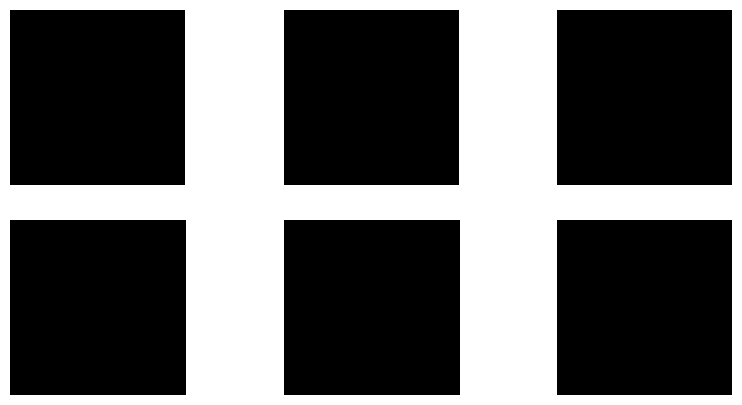

In [4]:
img = image.load_img("veggie_heap_training/Apatosaur Aphie's Apples/image (1).JPG")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

augmented_images = train_datagen.flow(img_array, batch_size=1)

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    batch = next(augmented_images)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
plt.show()

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size= Img_Size,
    batch_size= batch_size,
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size= Img_Size,
    batch_size= batch_size,
    class_mode = 'categorical',
    shuffle = True,
)

Found 9835 images belonging to 12 classes.
Found 2424 images belonging to 12 classes.


In [6]:
# Define the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Second Convolutional Layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Third Convolutional Layer
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Reduces overfitting
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Actual shape before Flatten:", K.int_shape(model.layers[-6].output))
print(K.int_shape(model.layers[1].output))  # After first max pooling
print(K.int_shape(model.layers[3].output))  # After second max pooling
print(K.int_shape(model.layers[5].output))  # After third max pooling
# Summary of the model
model.summary()
    

Actual shape before Flatten: (None, 26, 26, 128)
(None, 111, 111, 32)
(None, 54, 54, 64)
(None, 26, 26, 128)


/home/parth_234/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1743702748.485436    4308 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1743702748.485950    4308 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,530,508 (169.87 MB)

 Trainable params: 44,530,508 (169.87 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data = test_generator
)

/home/parth_234/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 136s 438ms/step - accuracy: 0.3625 - loss: 1.8913 - val_accuracy: 0.5021 - val_loss: 1.7745
Epoch 2/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 130s 421ms/step - accuracy: 0.7579 - loss: 0.6965 - val_accuracy: 0.5276 - val_loss: 2.3815
Epoch 3/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 134s 434ms/step - accuracy: 0.8024 - loss: 0.5749 - val_accuracy: 0.5644 - val_loss: 2.1817
Epoch 4/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 136s 442ms/step - accuracy: 0.8680 - loss: 0.3951 - val_accuracy: 0.5763 - val_loss: 2.3845
Epoch 5/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 135s 438ms/step - accuracy: 0.8563 - loss: 0.4372 - val_accuracy: 0.5561 - val_loss: 2.4724
Epoch 6/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 135s 437ms/step - accuracy: 0.8922 - loss: 0.3336 - val_accuracy: 0.6007 - val_loss: 2.4918
Epoch 7/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 136s 440ms/step - accuracy: 0.8908 - loss: 0.3146 - val_accuracy: 0.6782 - val_loss: 1.9881
Epoch 8/10
308/308 ━━━━━━━━━━━━━━━━━━━━ 139s 451ms/step - accuracy: 0.8914 -

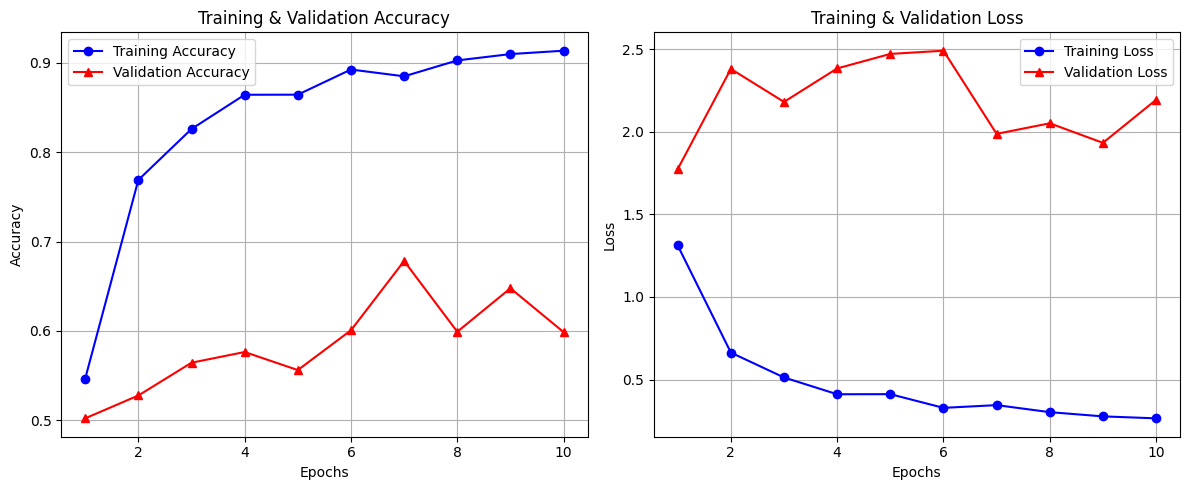

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 5))

# 🔹 Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')  # 'bo-' = blue circle line
plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')  # 'r^-' = red triangle line
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()

# 🔹 Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step


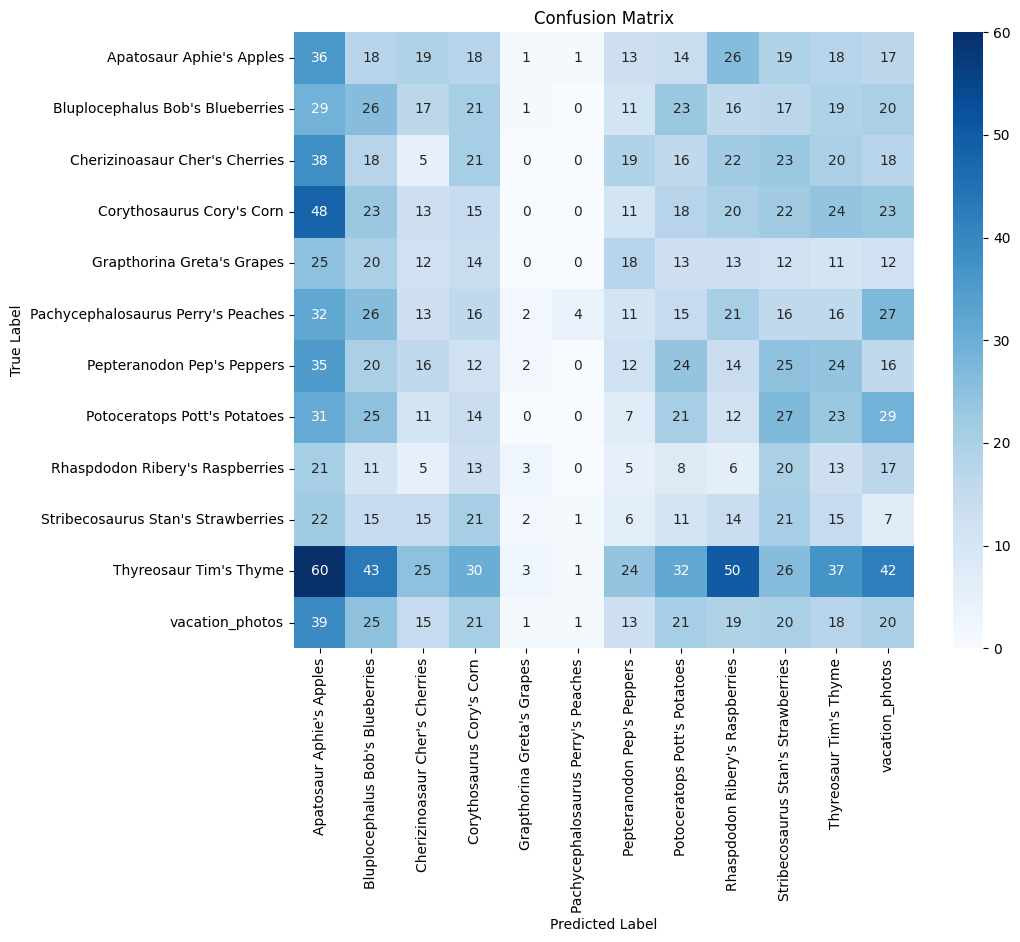

Classification Report:
                                     precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.09      0.18      0.12       200
  Bluplocephalus Bob's Blueberries       0.10      0.13      0.11       200
    Cherizinoasaur Cher's Cherries       0.03      0.03      0.03       200
         Corythosaurus Cory's Corn       0.07      0.07      0.07       217
        Grapthorina Greta's Grapes       0.00      0.00      0.00       150
Pachycephalosaurus Perry's Peaches       0.50      0.02      0.04       199
        Pepteranodon Pep's Peppers       0.08      0.06      0.07       200
      Potoceratops Pott's Potatoes       0.10      0.10      0.10       200
   Rhaspdodon Ribery's Raspberries       0.03      0.05      0.03       122
Stribecosaurus Stan's Strawberries       0.08      0.14      0.11       150
            Thyreosaur Tim's Thyme       0.16      0.10      0.12       373
                   vacation_photos       0.08      0.09      0.

In [15]:
# Get true labels & predictions
y_true = test_generator.classes  # Actual labels

# Predict using the best model
y_pred_probs = model.predict(test_generator)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


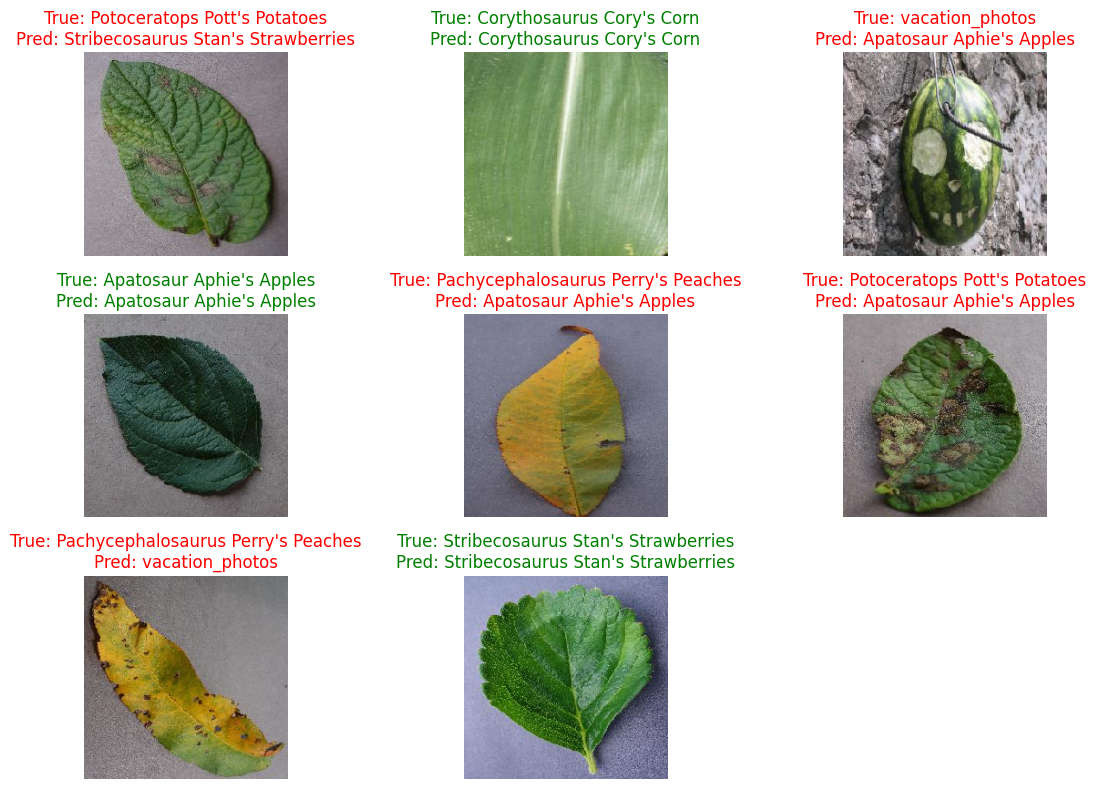

In [18]:
# Get a batch of images & labels from validation set
images, labels = next(test_generator)  # Fetch one batch (default batch_size=32)

# Predict using your trained model
y_pred_probs = model.predict(images)  # Get prediction probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class indices
y_true = np.argmax(labels, axis=1)  # Get true labels from one-hot encoding

plt.figure(figsize=(12, 8))

for i in range(8):  
    plt.subplot(3, 3, i + 1)  # 2 rows, 5 columns
    plt.imshow(images[i])  # Show image
    plt.axis("off")

    # Get actual & predicted class names
    actual_label = class_names[y_true[i]]
    predicted_label = class_names[y_pred[i]]

    # Set title color based on correctness
    color = "green" if actual_label == predicted_label else "red"
    plt.title(f"True: {actual_label}\nPred: {predicted_label}", color=color)

plt.tight_layout()
plt.show()